In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2, matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

In [2]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(34250, 5)


posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  
0                          Paper Bag Victoria Secret    249114794  
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045  
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891  
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188  
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069

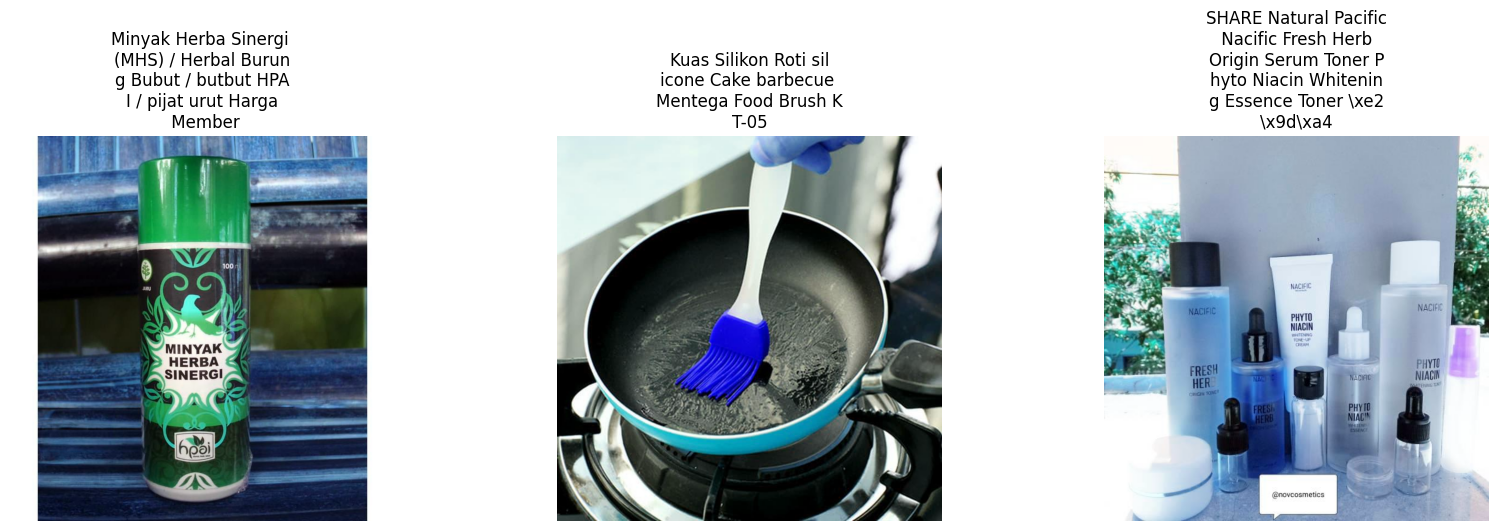

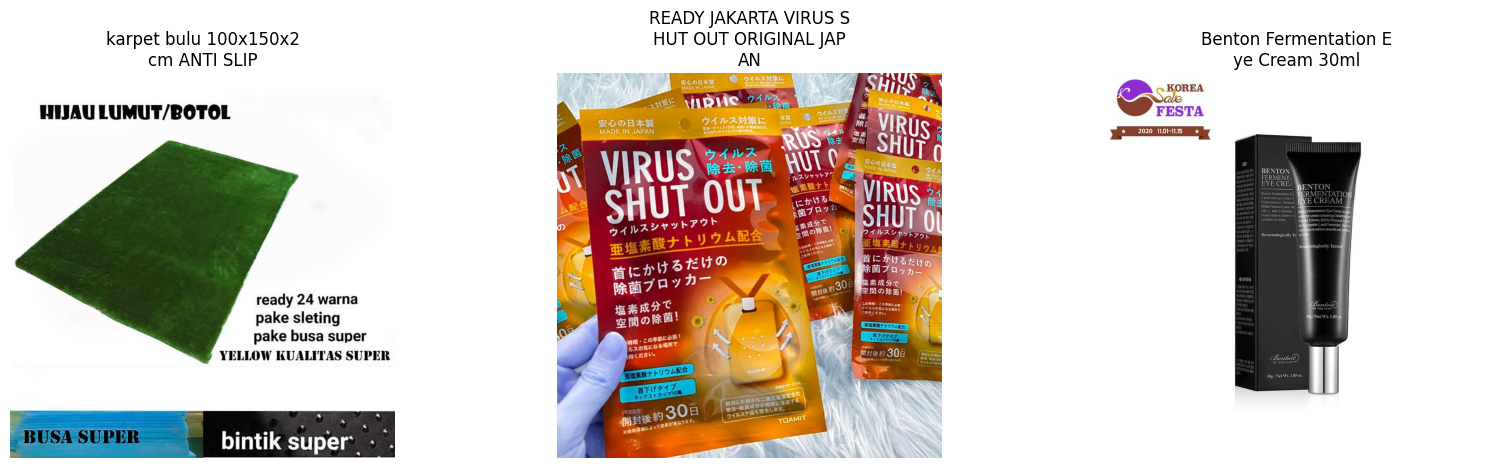

In [4]:
BASE = 'train_images/'

def displayDF(train, random=False, COLS=3, ROWS=2, path=BASE):
    for k in range(ROWS):
        plt.figure(figsize=(20,5))
        for j in range(COLS):
            if random: row = np.random.randint(0,len(train))
            else: row = COLS*k + j
            name = train.iloc[row,1]
            title = train.iloc[row,3]
            title_with_return = ""
            for i,ch in enumerate(title):
                title_with_return += ch
                if (i!=0)&(i%20==0): title_with_return += '\n'
            img = cv2.imread(path+name)
            plt.subplot(1,COLS,j+1)
            plt.title(title_with_return)
            plt.axis('off')
            plt.imshow(img)
        plt.show()
        
displayDF(train,random=True)

In [5]:
groups = train.groupby('label_group').count().sort_values('posting_id',ascending = False)
display(groups)

posting_id  image  image_phash  title
label_group                                       
1163569239           51     51           51     51
159351600            51     51           51     51
994676122            51     51           51     51
3113678103           51     51           51     51
3627744656           51     51           51     51
...                 ...    ...          ...    ...
2357508171            2      2            2      2
2357372960            2      2            2      2
2357221297            2      2            2      2
2355878351            2      2            2      2
2141883596            2      2            2      2

[11014 rows x 4 columns]

########################################
### TOP 1 DUPLICATED ITEM: 1163569239
########################################


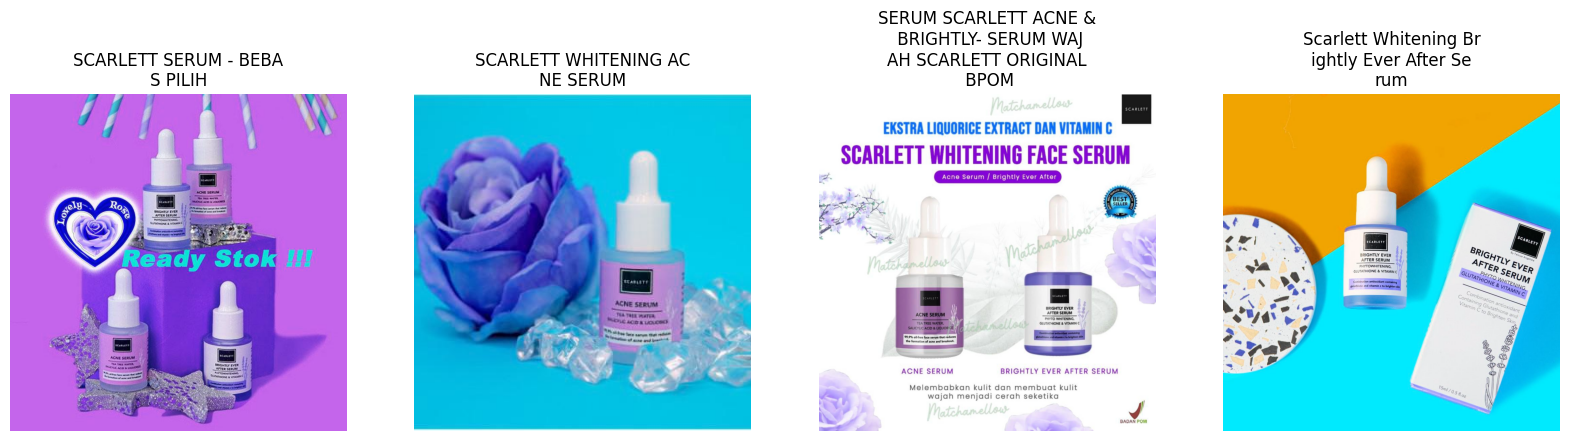

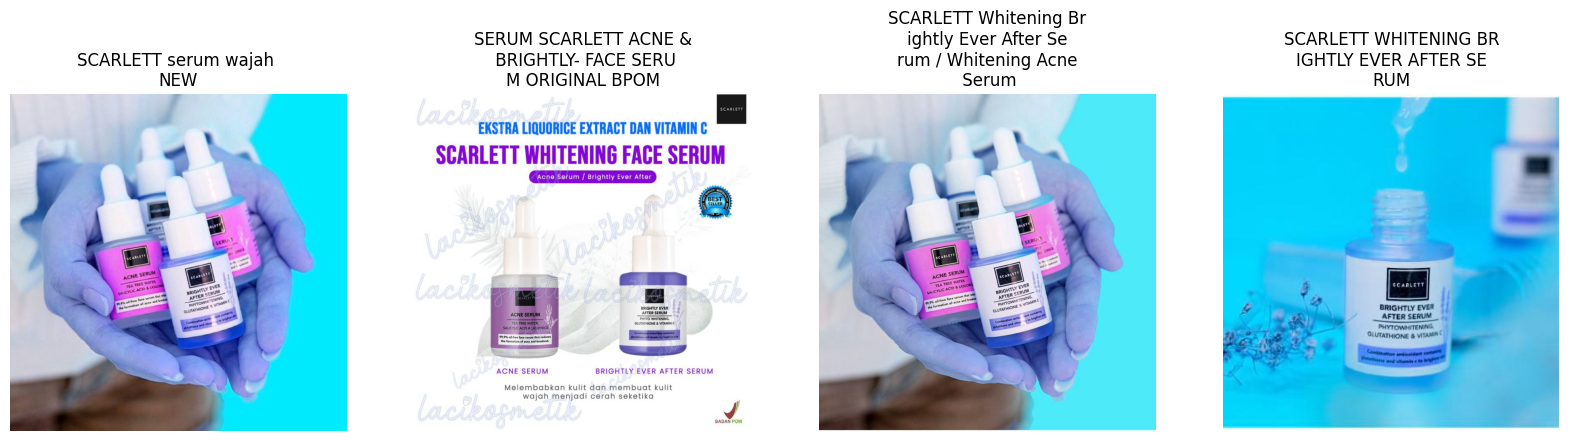

########################################
### TOP 2 DUPLICATED ITEM: 159351600
########################################


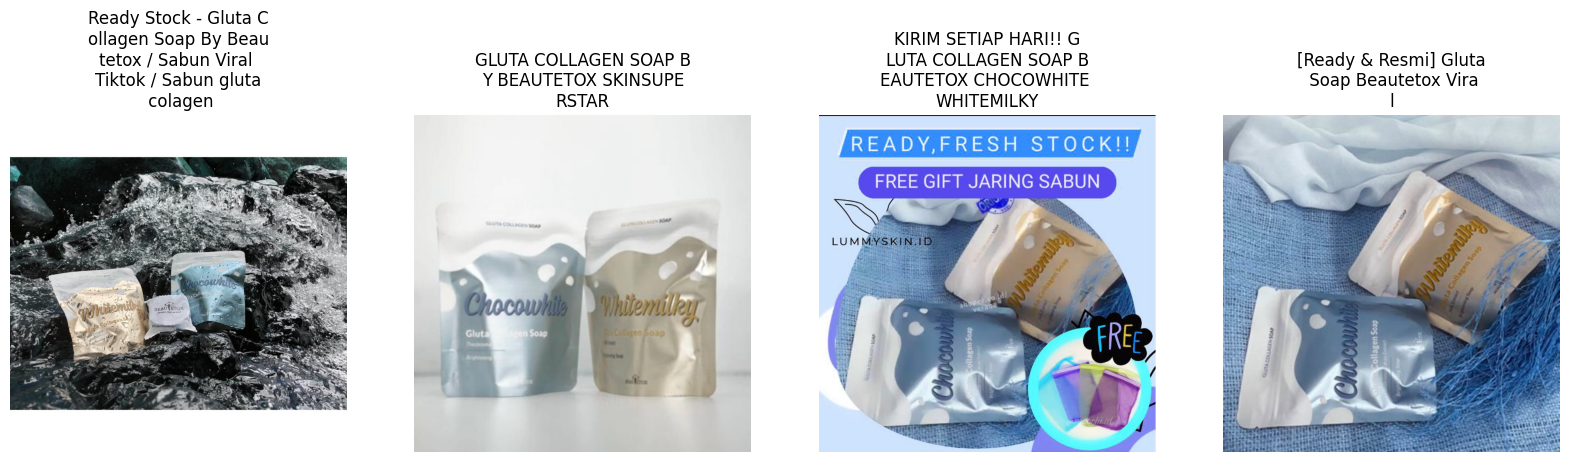

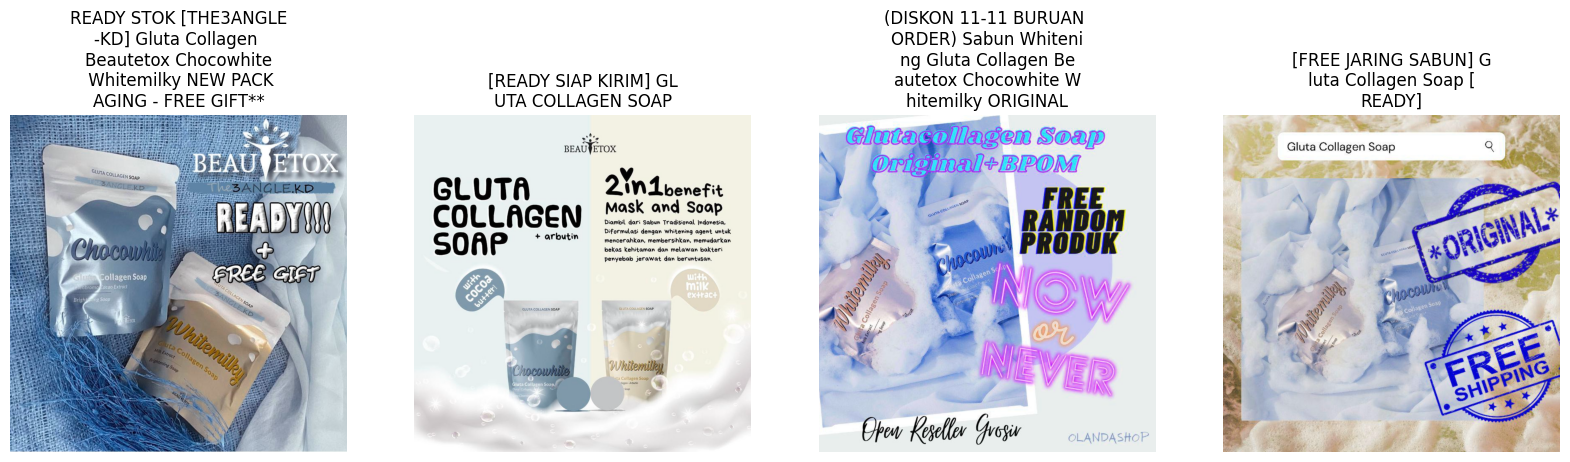

In [6]:
for k in range(2):
    print('#'*40)
    print('### TOP %i DUPLICATED ITEM:'%(k+1),groups.index[k])
    print('#'*40)
    top = train.loc[train.label_group==groups.index[k]]
    displayDF(top, random=False, ROWS=2, COLS=4)

# Matching with TEXT (title) similarity

In [9]:
# Text similarity matching:
import re
from nltk.stem.snowball import SnowballStemmer 
# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")

def tokenize_and_stem(text):
    tokens = [words for words in nltk.word_tokenize(text)]
    # Filter out raw tokens to remove noise and tokens that are too short
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token) and len(token) > 2]
    stems = [stemmer.stem(word) for word in filtered_tokens]
    return stems
#examples: 
words_stemmed = tokenize_and_stem(train['title'][3])
print(words_stemmed)

['daster', 'batik', 'lengan', 'pendek', 'motif', 'acak', 'campur', 'leher', 'kanc', 'dpt001-00', 'batik', 'karakt', 'alhadi']


In [10]:
# Create TfidfVectorizer
# Import TfidfVectorizer to create TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer
# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text
tfidf_vectorizer = TfidfVectorizer(stop_words='english',
                                   tokenizer=tokenize_and_stem)

tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in train['title']])
print(tfidf_matrix.shape)

c:\Users\voqua\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\voqua\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 't

(34250, 25904)


In [11]:
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
# Import KNN to perform matching up to 50 similar products
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors (n_neighbors=50)
knn.fit(tfidf_matrix)
distances, indices = knn.kneighbors(tfidf_matrix)

In [13]:
print(distances)
print(indices)

[[0.         0.         1.         ... 1.26917782 1.26970775 1.27053942]
 [0.         0.75957413 0.75957413 ... 1.22587843 1.22631534 1.22631534]
 [0.         0.61192756 1.         ... 1.3489108  1.34966106 1.35028118]
 ...
 [0.         0.82882625 0.86946462 ... 1.28907543 1.28907543 1.29124835]
 [0.         0.81952888 1.         ... 1.32396012 1.32702968 1.32722922]
 [0.         0.97034283 1.         ... 1.31289159 1.31325079 1.31360314]]
[[33161     0  6453 ...  6859  9650 27619]
 [    1 21790 19262 ... 12109 24566 21079]
 [    2 15668  6453 ... 23310 28715 17191]
 ...
 [34247 18379 13116 ... 25462  3910 30936]
 [34248 20813  6453 ... 24163 22809 31190]
 [34249 33792  6453 ... 13983  1339 17742]]


########################################
### TOP 181 DUPLICATED ITEM: 1035128795
########################################


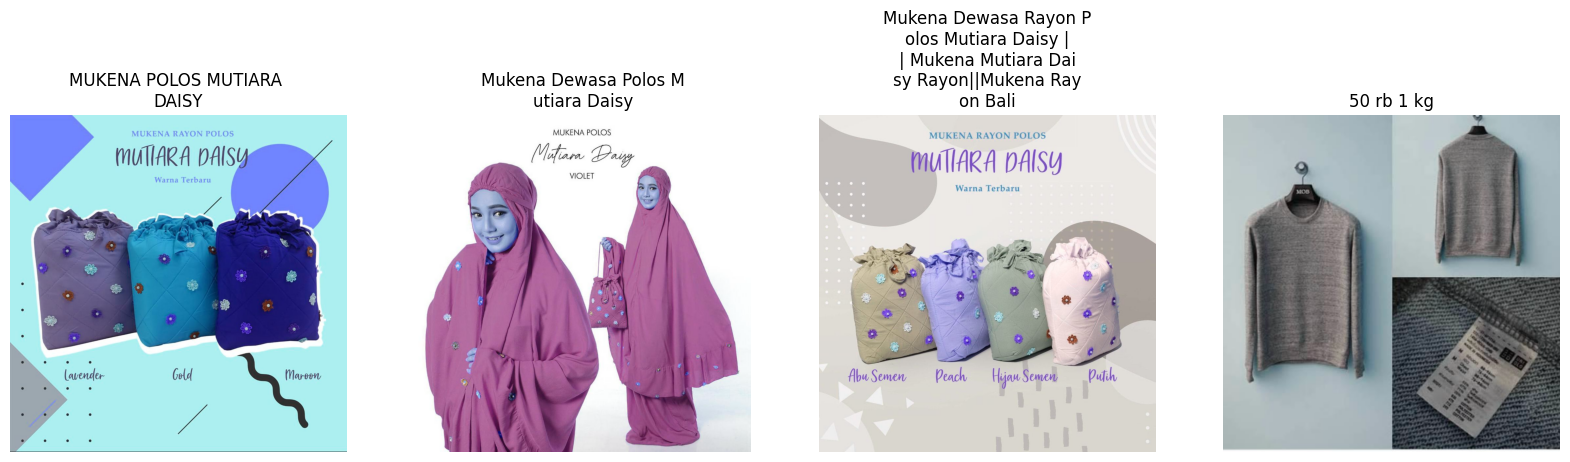

########################################
### TOP 182 DUPLICATED ITEM: 645628
########################################


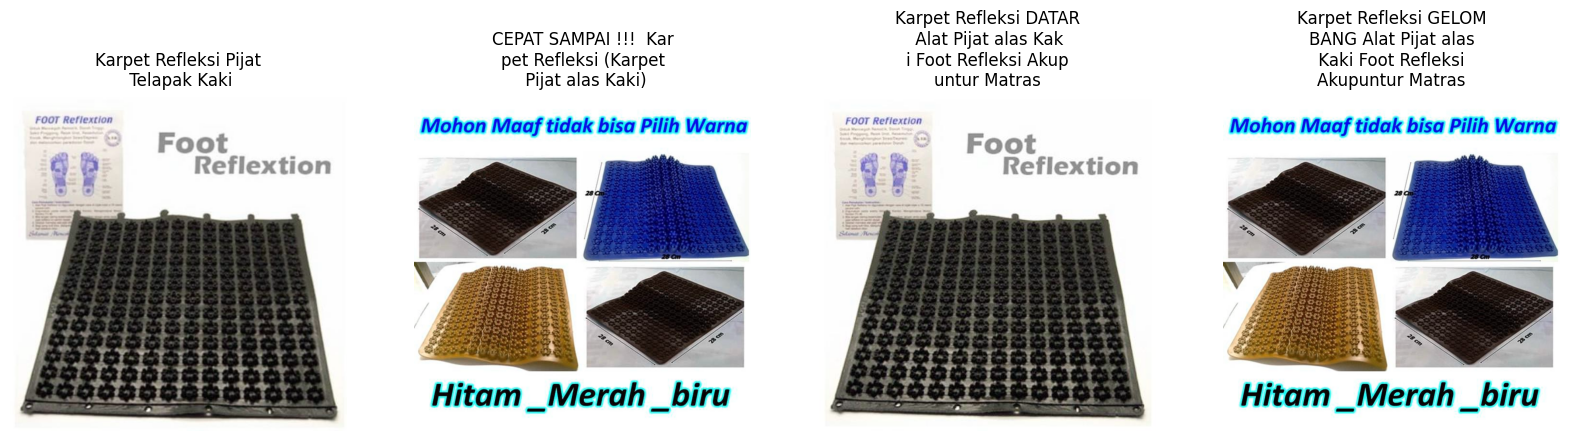

In [14]:
for k in range(180,182):
    print('#'*40)
    print('### TOP %i DUPLICATED ITEM:'%(k+1),groups.index[k])
    print('#'*40)
    top = train.loc[indices[k,:4]]
    displayDF(top, random=False, ROWS=1, COLS=4)

# Test data

In [15]:
# Map the product to its duplicates with 'target' 
COMPUTE_CV = True

test = pd.read_csv('test.csv')
if len(test)>3: COMPUTE_CV = False
else: print('this submission notebook will compute CV score, but commit notebook will not')
    
train = pd.read_csv('train.csv')
tmp = train.groupby('label_group').posting_id.agg('unique').to_dict()
train['target'] = train.label_group.map(tmp)
print('train shape is', train.shape )
train.head()

this submission notebook will compute CV score, but commit notebook will not
train shape is (34250, 6)


posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  \
0                          Paper Bag Victoria Secret    249114794   
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045   
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891   
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188   
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069   

                                 target  
0   [train_129225211, train_2278313361]  
1  [train_3386243561, train_3423213080]  
2  [train_2288590299, train_3803689425]  
3  [train_2406599165, train_3342059966]  
4   [train_3369186413, train_921438619]

In [16]:
print(tmp[249114794])

['train_129225211' 'train_2278313361']


In [17]:
# Calculate CV score for baseline phash similarirty performance
tmp = train.groupby('image_phash').posting_id.agg('unique').to_dict()
train['oof'] = train.image_phash.map(tmp)
def getMetric(col):
    def f1score(row):
        n = len( np.intersect1d(row.target,row[col]) )
        return 2*n / (len(row.target)+len(row[col]))
    return f1score
train['f1'] = train.apply(getMetric('oof'),axis=1)
print('CV score for baseline =',train.f1.mean())

CV score for baseline = 0.5530933399168149


# Compute Model CV and Infer Submission
We will now use image embeddings, text embeddings, and phash to create a better model with better CV. We will also infer submission csv.

In [18]:
if COMPUTE_CV:
    test = pd.read_csv('train.csv')
    print('Using train as test to compute CV (since commit notebook). Shape is', test.shape )
else:
    test = pd.read_csv('test.csv')
    print('Test shape is', test.shape )
test.head()

Using train as test to compute CV (since commit notebook). Shape is (34250, 5)


posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  
0                          Paper Bag Victoria Secret    249114794  
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045  
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891  
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188  
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069

# Use Text Embeddings


In [19]:
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in test['title']]).toarray()
print(tfidf_matrix.shape)

c:\Users\voqua\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(34250, 25904)


In [20]:
preds = []
CHUNK = 1024*4
text_embeddings = tfidf_matrix
print('Finding similar titles...')
CTS = len(test)//CHUNK
if len(test)%CHUNK!=0: CTS += 1

import numpy as np

for j in range(CTS):
    a = j * CHUNK
    b = (j + 1) * CHUNK
    b = min(b, len(test))
    print('chunk', a, 'to', b)

    # COSINE SIMILARITY DISTANCE
    cts = np.matmul( text_embeddings, text_embeddings[a:b].T).T
    for k in range(b - a):
        IDX = np.where(cts[k,] > 0.7)[0]
        o = test.iloc[IDX].posting_id.values
        preds.append(o)
test['preds'] = preds
test.head()

Finding similar titles...
chunk 0 to 4096
chunk 4096 to 8192
chunk 8192 to 12288
chunk 12288 to 16384
chunk 16384 to 20480
chunk 20480 to 24576
chunk 24576 to 28672
chunk 28672 to 32768
chunk 32768 to 34250


posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  \
0                          Paper Bag Victoria Secret    249114794   
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045   
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891   
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188   
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069   

                                               preds  
0                [train_129225211, train_2278313361]  
1  [train_3386243561, train_860027362, train_2112...  
2               [train_2288590299, train_3803689425]  
3  [train_2406599165, train_3576714541, train_150...  
4                                 [train_3369186413]

In [21]:
# CV score of Text similarity detection
def combine_for_sub(row):
    x = np.concatenate([row.preds])
    return ' '.join( np.unique(x) )

def combine_for_cv(row):
    x = np.concatenate([row.preds])
    return np.unique(x)

if COMPUTE_CV:
    tmp = test.groupby('label_group').posting_id.agg('unique').to_dict()
    test['target'] = test.label_group.map(tmp)
    test['oof'] = test.apply(combine_for_cv,axis=1)
    test['f1'] = test.apply(getMetric('oof'),axis=1)
    print('CV Score =', test.f1.mean() )

test['matches'] = test.apply(combine_for_sub,axis=1)

CV Score = 0.614013844064073


[1, 10444, 19262, 21790]


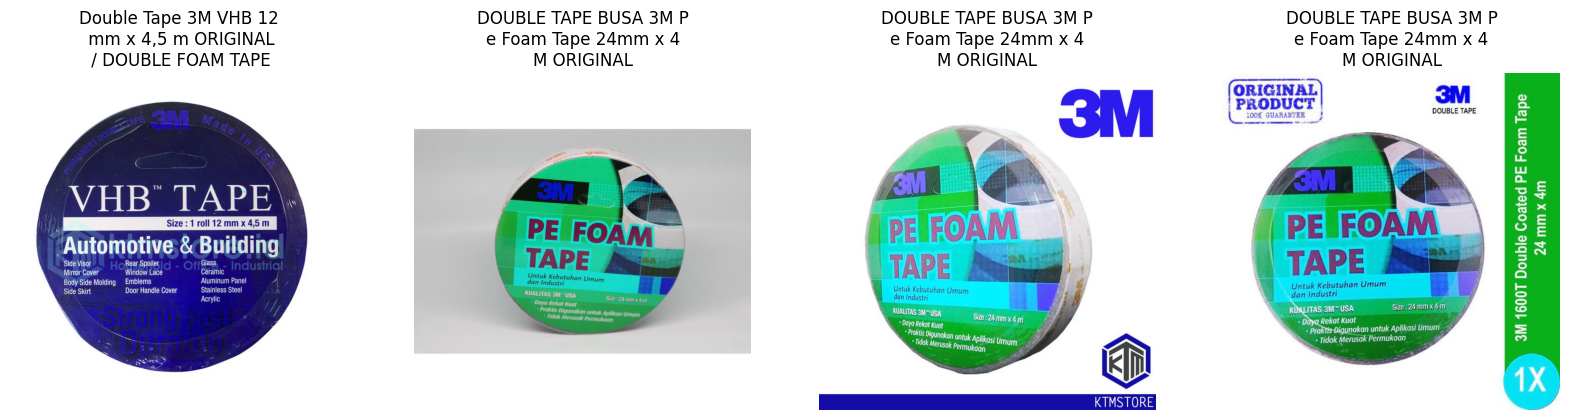

In [22]:
# Display similarity based on item index k
k = 1
indices = []
for i in test.iloc[k]['preds']:
    index = test[test['posting_id'] == i].index[0]
    indices.append(index)

print(indices)

top = test.iloc[indices]

displayDF(top, random=False, ROWS=1, COLS=len(indices))


# Using Image

In [23]:
class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, df, img_size=256, batch_size=32, path=BASE): 
        self.df = df
        self.img_size = img_size
        self.batch_size = batch_size
        self.path = path
        self.indexes = np.arange( len(self.df) )
        
    def __len__(self):
        'Denotes the number of batches per epoch'
        ct = len(self.df) // self.batch_size
        ct += int(( (len(self.df)) % self.batch_size)!=0)
        return ct

    def __getitem__(self, index):
        'Generate one batch of data'
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        X = self.__data_generation(indexes)
        return X
            
    def __data_generation(self, indexes):
        'Generates data containing batch_size samples' 
        X = np.zeros((len(indexes),self.img_size,self.img_size,3),dtype='float32')
        df = self.df.iloc[indexes]
        for i,(index,row) in enumerate(df.iterrows()):
            img = cv2.imread(self.path+row.image)
            X[i,] = cv2.resize(img,(self.img_size,self.img_size)) #/128.0 - 1.0
        return X

In [24]:
model = EfficientNetB0(weights='imagenet',include_top=False, pooling='avg', input_shape=None)
train_gen = DataGenerator(train, batch_size=128)
image_embeddings = model.predict(train_gen,verbose=1)
print('image embeddings shape is',image_embeddings.shape)



268/268 [==============================] - 1019s 4s/step
image embeddings shape is (34250, 1280)


In [25]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=50)
model.fit(image_embeddings)
distances, indices = model.kneighbors(image_embeddings)

In [26]:
preds = []
CHUNK = 1024*4
print('Finding similar images...')
CTS = len(image_embeddings)//CHUNK
if len(image_embeddings)%CHUNK!=0: CTS += 1
for j in range( CTS ):
    
    a = j*CHUNK
    b = (j+1)*CHUNK
    b = min(b,len(image_embeddings))
    print('chunk',a,'to',b)
    distances, indices = model.kneighbors(image_embeddings[a:b,])
    
    for k in range(b-a):
        IDX = np.where(distances[k,]<6.0)[0]
        IDS = indices[k,IDX]
        o = test.iloc[IDS].posting_id.values
        preds.append(o)
        
test['preds2'] = preds
test.head()

Finding similar images...
chunk 0 to 4096
chunk 4096 to 8192
chunk 8192 to 12288
chunk 12288 to 16384
chunk 16384 to 20480
chunk 20480 to 24576
chunk 24576 to 28672
chunk 28672 to 32768
chunk 32768 to 34250


posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  \
0                          Paper Bag Victoria Secret    249114794   
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045   
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891   
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188   
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069   

                                               preds  \
0                [train_129225211, train_2278313361]   
1  [train_3386243561, train_860027362, train_2112...   
2               [train_2288590299, train_3803689425]   
3  [train_2406599165, train_3576714541, train_150...   
4                                 [train_3369186413]   

                                 target  \
0   [train_129225211, train_2278313361]   
1  [train_3386243561, train_3423213080]   
2  [train_2288590299, train_3803689425]   
3  [train_2406599165, train_3342059966]   
4   [train_3369186413, train_921438619]   

                                                 oof        f1  \
0                [train_129225211, train_2278313361]  1.000000   
1  [train_1974987067, train_211200223, train_3386...  0.333333   
2               [train_2288590299, train_3803689425]  1.000000   
3  [train_1508100548, train_1744956981, train_240...  0.285714   
4                                 [train_3369186413]  0.666667   

                                             matches  \
0                   train_129225211 train_2278313361   
1  train_1974987067 train_211200223 train_3386243...   
2                  train_2288590299 train_3803689425   
3  train_1508100548 train_1744956981 train_240659...   
4                                   train_3369186413   

                                preds2  
0                    [train_129225211]  
1                   [train_3386243561]  
2                   [train_2288590299]  
3                   [train_2406599165]  
4  [train_3369186413, train_921438619]

In [27]:
def combine_for_sub(row):
    x = np.concatenate([row.preds2])
    return ' '.join( np.unique(x) )

def combine_for_cv(row):
    x = np.concatenate([row.preds2])
    return np.unique(x)

if COMPUTE_CV:
    tmp = test.groupby('label_group').posting_id.agg('unique').to_dict()
    test['target'] = test.label_group.map(tmp)
    test['oof'] = test.apply(combine_for_cv,axis=1)
    test['f1'] = test.apply(getMetric('oof'),axis=1)
    print('CV Score =', test.f1.mean() )

test['matches'] = test.apply(combine_for_sub,axis=1)

CV Score = 0.6353634830483922


[4, 18449]


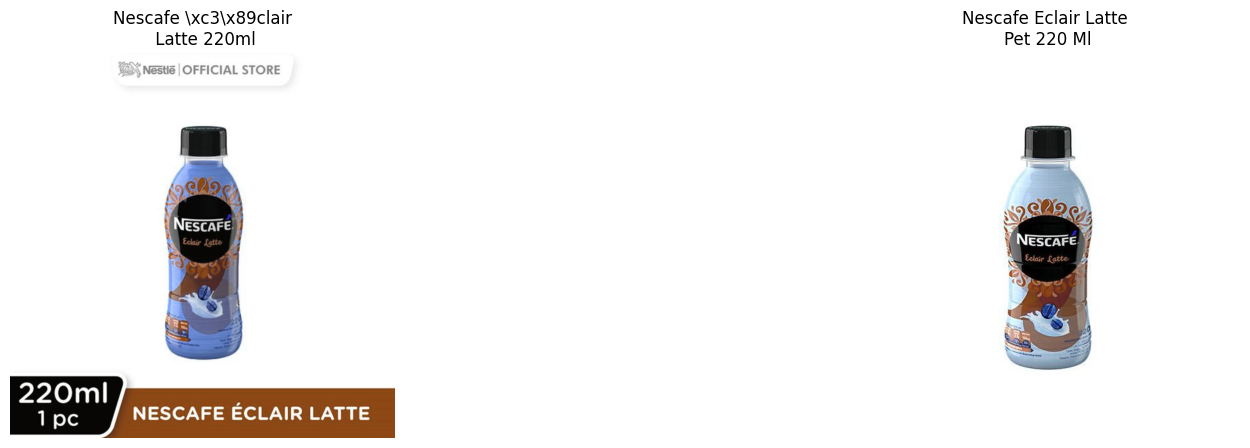

In [41]:
# Display similarity based on item index k
k = 4
indices = []
for i in test.iloc[k]['preds2']:
    index = test[test['posting_id'] == i].index[0]
    indices.append(index)

print(indices)

top = test.iloc[indices]

displayDF(top, random=False, ROWS=1, COLS=len(indices))

In [42]:
# Combine 2 methods:

def combine_for_sub(row):
    x = np.concatenate([row.preds, row.preds2])
    return ' '.join( np.unique(x) )

def combine_for_cv(row):
    x = np.concatenate([row.preds, row.preds2])
    return np.unique(x)

if COMPUTE_CV:
    tmp = test.groupby('label_group').posting_id.agg('unique').to_dict()
    test['target'] = test.label_group.map(tmp)
    test['oof'] = test.apply(combine_for_cv,axis=1)
    test['f1'] = test.apply(getMetric('oof'),axis=1)
    print('CV Score =', test.f1.mean() )

test['matches'] = test.apply(combine_for_sub,axis=1)

CV Score = 0.7176388950204692


In [43]:
test[['posting_id','matches']].to_csv('submission.csv',index=False)
sub = pd.read_csv('submission.csv')
sub.head()

posting_id                                            matches
0   train_129225211                   train_129225211 train_2278313361
1  train_3386243561  train_1974987067 train_211200223 train_3386243...
2  train_2288590299                  train_2288590299 train_3803689425
3  train_2406599165  train_1508100548 train_1744956981 train_240659...
4  train_3369186413                   train_3369186413 train_921438619